In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Fraud_check.csv")

In [3]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
df.shape

(600, 6)

In [5]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [6]:
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [8]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [9]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [10]:
df['Undergrad'] = df['Undergrad'].apply(lambda x: 1 if x=='YES' else 0)
df['Urban'] = df['Urban'].apply(lambda x: 1 if x=='YES' else 0)
df['Taxable.Income'] = df['Taxable.Income'].apply(lambda x: 'Risky' if x>30000  else 'Good')

In [11]:
df['Marital.Status'].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

In [12]:
df['Marital.Status'] = df['Marital.Status'].map({'Single':1, 'Married':2, 'Divorced':3})

In [13]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,1,Risky,50047,10,1
1,1,3,Risky,134075,18,1
2,0,2,Risky,160205,30,1
3,1,1,Risky,193264,15,1
4,0,2,Risky,27533,28,0


In [14]:
df['Marital.Status'].value_counts()

1    217
2    194
3    189
Name: Marital.Status, dtype: int64

array([[<AxesSubplot:title={'center':'Undergrad'}>,
        <AxesSubplot:title={'center':'Marital.Status'}>],
       [<AxesSubplot:title={'center':'City.Population'}>,
        <AxesSubplot:title={'center':'Work.Experience'}>],
       [<AxesSubplot:title={'center':'Urban'}>, <AxesSubplot:>]],
      dtype=object)

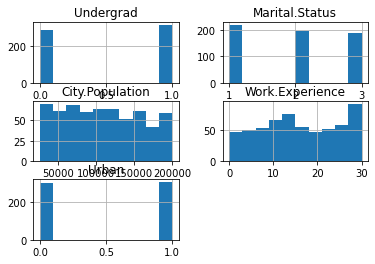

In [15]:
df.hist()

In [16]:
import seaborn as sns

In [17]:
df.head(2)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,1,Risky,50047,10,1
1,1,3,Risky,134075,18,1


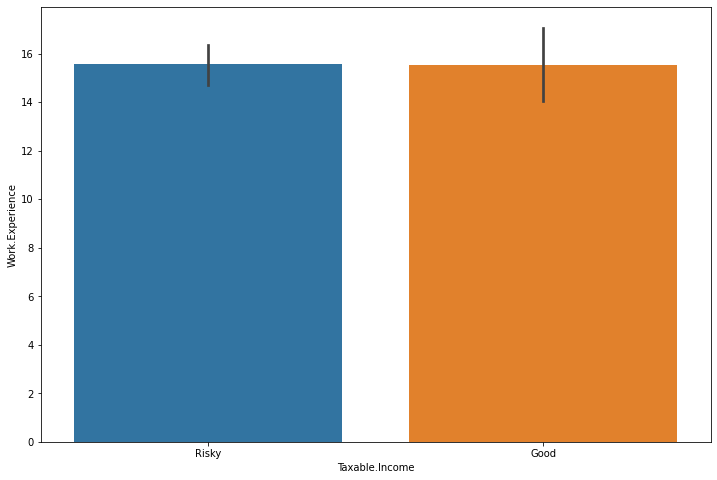

In [18]:
plt.figure(figsize = (12,8))
sns.barplot(x='Taxable.Income', y = 'Work.Experience', data = df)
plt.show()

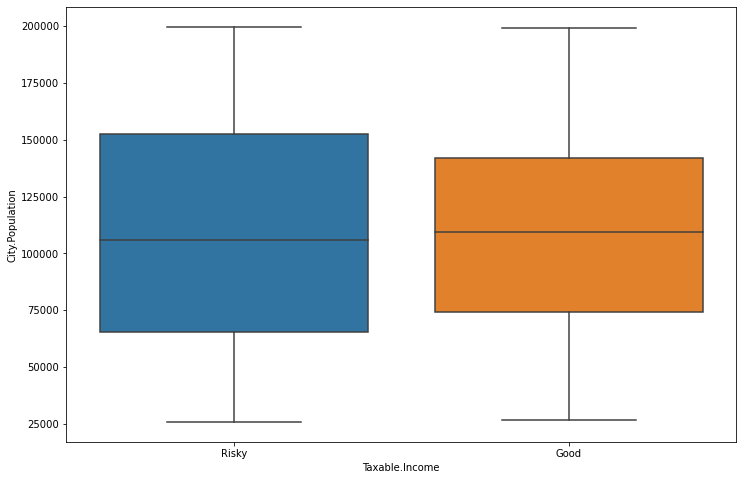

In [19]:
plt.figure(figsize = (12,8))
sns.boxplot(x='Taxable.Income', y = 'City.Population', data = df)
plt.show()

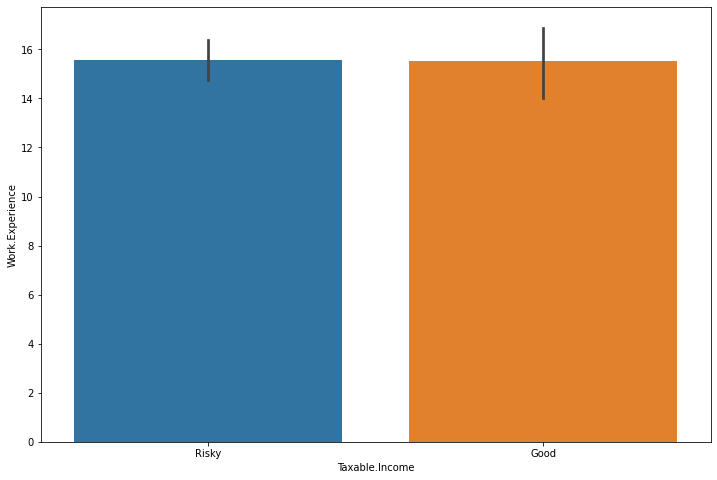

In [20]:
plt.figure(figsize = (12,8))
sns.barplot(x='Taxable.Income', y = 'Work.Experience', data = df)
plt.show()

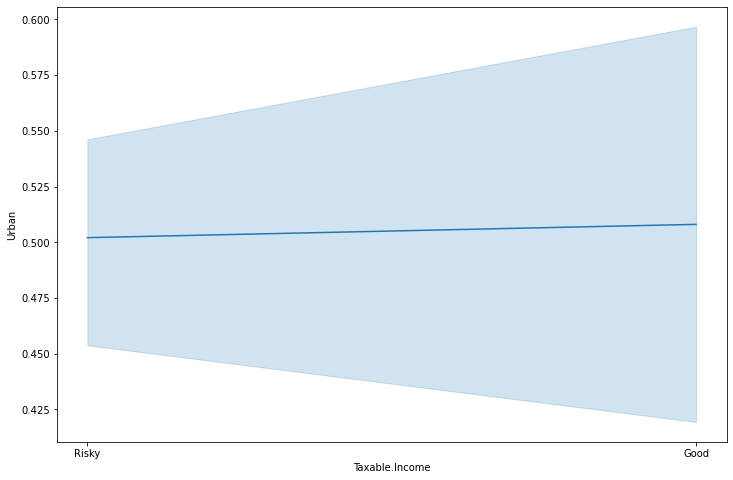

In [21]:
plt.figure(figsize = (12,8))
sns.lineplot(x='Taxable.Income', y = 'Urban', data = df)
plt.show()

In [22]:
## riskey = 0 , good = 1
#df['Taxable.Income'] = df['Taxable.Income'].apply(lambda x: 0 if x== 'Risky'  else 1)

In [23]:
## Train test the data
train = df.drop('Taxable.Income',axis=1)
test = df['Taxable.Income']

In [24]:
## train test split
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size = 0.3,random_state = 1)

## Standardize the Data

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()

In [28]:
col = X_train.columns
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [29]:
X_train = pd.DataFrame(X_train, columns=col)
X_test = pd.DataFrame(X_test, columns=col)

In [30]:
X_train.shape

(420, 5)

In [31]:
X_test.shape

(180, 5)

## build random forest only

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
df.head(2)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,1,Risky,50047,10,1
1,1,3,Risky,134075,18,1


In [34]:
rf_model = RandomForestClassifier(n_estimators= 100)

In [35]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
rf_model_pred = rf_model.predict(X_test)

In [37]:
rf_model_actual_predict = pd.DataFrame({'Actual': y_test, 'Predict': rf_model_pred})

In [38]:
rf_model_actual_predict[20:40]

,Actual,Predict
13,Risky,Risky
510,Risky,Risky
268,Risky,Risky
358,Risky,Risky
289,Risky,Risky
483,Good,Risky
429,Risky,Risky
47,Risky,Risky
223,Risky,Risky
185,Risky,Risky


In [39]:
rf_model.score(X_test, y_test)*100

78.33333333333333

## Apply Baging 

In [40]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [41]:
bg = BaggingClassifier(base_estimator= DecisionTreeClassifier(), max_samples = 0.5, max_features =1.0, n_estimators = 100, random_state=8)

In [42]:
bg.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.5,
                  n_estimators=100, random_state=8)

In [43]:
bg_prid = bg.predict(X_test)

In [44]:
bg_actual_prid = pd.DataFrame({'Actual':y_test, 'Pridict': bg_prid})

In [45]:
bg_actual_prid[:10]

,Actual,Pridict
446,Good,Risky
404,Risky,Risky
509,Good,Risky
455,Risky,Risky
201,Risky,Risky
23,Risky,Risky
415,Risky,Risky
548,Risky,Risky
66,Risky,Risky
165,Risky,Risky


In [46]:
bg.score(X_test, y_test)

0.7888888888888889

## Ada Boosting

In [47]:
from sklearn.ensemble import AdaBoostClassifier

In [48]:
boost = AdaBoostClassifier(base_estimator= DecisionTreeClassifier(), n_estimators=100, learning_rate=1)

In [49]:
boost.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=1,
                   n_estimators=100)

In [50]:
boost_pred = boost.predict(X_test)

In [51]:
boost_actual_predict = pd.DataFrame({"Actual": y_test, 'Predict': boost_pred})

In [52]:
boost_actual_predict[:10]

,Actual,Predict
446,Good,Risky
404,Risky,Good
509,Good,Risky
455,Risky,Risky
201,Risky,Risky
23,Risky,Risky
415,Risky,Good
548,Risky,Good
66,Risky,Risky
165,Risky,Good


In [53]:
boost.score(X_test, y_test)

0.65

## build the Random Forest model using kfold

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

In [55]:
kfold = KFold(n_splits=10)

In [56]:
num_trees = 100

In [57]:
max_feature = 3

In [58]:
rfc = RandomForestClassifier(n_estimators=num_trees, max_features= max_feature)

In [59]:
rfc = cross_val_score(rfc, train , test, cv=kfold)

In [60]:
rfc

array([0.76666667, 0.71666667, 0.65      , 0.66666667, 0.71666667,
       0.63333333, 0.86666667, 0.73333333, 0.76666667, 0.85      ])

In [61]:
rfc.mean()*100

73.66666666666666

In [62]:
rfc.std()*100

7.446102634562893